# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


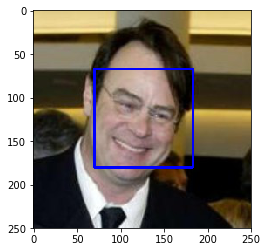

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def assess_human_detector (hum_arr, dog_arr):
    hum_count = 0
    dog_count = 0
    hum_arr_size = len (hum_arr)
    for i in range (0, hum_arr_size):
        if face_detector(human_files_short[i]) == True: 
            hum_count += 1
        if face_detector(dog_files_short[i]) == True:
            dog_count += 1
    # print percentage of detection in each array
    print('The detector detects %d%% of human faces.' % hum_count)
    print('The detector detects %d%% of dog faces.' % dog_count)

# call the function assess_human_detector
assess_human_detector(human_files_short, dog_files_short)

The detector detects 98% of human faces.
The detector detects 17% of dog faces.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:10<00:00, 51368109.17it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable


# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# image pre processing function
def image_pre_processing(img_path):
    img_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    image = Image.open(img_path)
    image = img_transform(image).float()
    # create a PyTorch Variable with the transformed image
    image = Variable(image, requires_grad=True) 
    image = image.unsqueeze(0)  
    
    # because of using GPU
    image_tensor = image.cuda() 
    return image_tensor

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    # call image_pre_processing function
    img = image_pre_processing(img_path)
    
    ## Return the *index* of the predicted class for that image
    output = VGG16(img)
    _ ,pred_tensor = torch.max(output, 1) 
    pred_index = np.squeeze(pred_tensor.numpy())if not use_cuda else np.squeeze(pred_tensor.cpu().numpy())
    
    return int(pred_index) # predicted class index


img_p = '/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg'
# call VGG16_predict function
print('The index of predicted class is:')
VGG16_predict (img_p)

The index of predicted class is:


252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    dog_face = VGG16_predict(img_path)
    return ((dog_face <= 268) & (dog_face >= 151))

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

def assess_dog_detector (hum_arr, dog_arr):
    hum_count = 0
    dog_count = 0
    hum_arr_size = len (hum_arr)
    for i in range (0, hum_arr_size):
        if dog_detector(human_files_short[i]) == True: 
            hum_count += 1
        if dog_detector(dog_files_short[i]) == True:
            dog_count += 1
    # print percentage of detection in each array
    print('The detector detects %d%% of human faces.' % hum_count)
    print('The detector detects %d%% of dog faces.' % dog_count)

# call the function assess_human_detector
assess_dog_detector(human_files_short, dog_files_short)

The detector detects 2% of human faces.
The detector detects 98% of dog faces.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
# from torch.utils.data import Dataset, DataLoader
# import os
# from torchvision import datasets
# import torchvision.transforms as transforms
# from torch.utils.data.sampler import SubsetRandomSampler
# import torch
# import torchvision.models as models

# class MyDataset(Dataset):
#     def __init__(self, image_paths, transform=transforms):
#         self.image_paths = image_paths
#         self.transforms = transforms
        
#     def __getitem__(self, index):
#         image = Image.open(self.image_paths[index])
#         image = image.convert('RGB')
#         if self.transforms:
#             image = self.transforms(image)
#         return image

In [1]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import torchvision.models as models


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 40

# transform for the train dataset with aumuntation
transform_trn = transforms.Compose([ 
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(), #randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    ])

# transform for validation and testing datasets
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
transform = transforms.Compose([
           transforms.Resize(256),
           transforms.CenterCrop(224),
            transforms.ToTensor(),
            normalize,
        ])

# choose the training and test datasets
train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform_trn)
val_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform)

# ***********************************************************************************************
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size= batch_size, 
    shuffle=False, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= batch_size,shuffle=False,
    num_workers=num_workers)

root='/data/dog_images/train'
classes = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
print ("the number of dogs classes in train dataset is:",len(classes))
print (classes)

the number of dogs classes in train dataset is: 133
['103.Mastiff', '059.Doberman_pinscher', '055.Curly-coated_retriever', '031.Borzoi', '024.Bichon_frise', '049.Chinese_crested', '067.Finnish_spitz', '130.Welsh_springer_spaniel', '019.Bedlington_terrier', '115.Papillon', '126.Saint_bernard', '013.Australian_terrier', '116.Parson_russell_terrier', '107.Norfolk_terrier', '133.Yorkshire_terrier', '032.Boston_terrier', '108.Norwegian_buhund', '028.Bluetick_coonhound', '066.Field_spaniel', '129.Tibetan_mastiff', '005.Alaskan_malamute', '102.Manchester_terrier', '034.Boxer', '068.Flat-coated_retriever', '089.Irish_wolfhound', '104.Miniature_schnauzer', '035.Boykin_spaniel', '080.Greater_swiss_mountain_dog', '007.American_foxhound', '112.Nova_scotia_duck_tolling_retriever', '025.Black_and_tan_coonhound', '072.German_shorthaired_pointer', '062.English_setter', '029.Border_collie', '045.Cardigan_welsh_corgi', '105.Neapolitan_mastiff', '076.Golden_retriever', '063.English_springer_spaniel', '07

In [2]:
# check lenght of datasets
print("The size of train dataset:", len(train_data),'\nThe size of validation dataset:', len(val_data), 
      '\nThe size of test dataset:', len(test_data))

The size of train dataset: 6680 
The size of validation dataset: 835 
The size of test dataset: 836


In [3]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# from __future__ import print_function, absolute_import

# __all__ = ['accuracy']
# import torch
# from torchvision import datasets, transforms, models
# import torchvision.transforms as transforms
# from torch.utils.data.sampler import SubsetRandomSampler
# import matplotlib.pyplot as plt

# from torch import nn
# from torch import optim
# import torch.nn.functional as F
# from collections import OrderedDict

# import numpy as np
# from tqdm import tqdm
# import sys

# class UnNormalize(object):
#     def __init__(self, mean, std):
#         self.mean = mean
#         self.std = std

#     def __call__(self, tensor):
#         """
#         Args:
#             tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
#         Returns:
#             Tensor: Normalized image.
#         """
#         for t, m, s in zip(tensor, self.mean, self.std):
#             t.mul_(s).add_(m)
#             # The normalize code -> t.sub_(m).div_(s)
#         return tensor

    
# # helper function to un-normalize and display an image
# def imshow(img):
#     unorm = UnNormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#     img_norm = unorm(img)
#     images = img_norm.numpy()
#     plt.imshow(np.transpose(images, (1, 2, 0)))
#     plt.show()


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- How does your code resize the images (by cropping, stretching, etc)? What size did you pick for the input tensor, and why?
The images are resized by 256 with center crop 224. This is to put all the input images at same sizes (hight and width). The reason of choosing these sizes is becuase the images have high resolution and contain small details which are hard to detect. Additinally, most well known models used image sizes in these ranges. 

- Did you decide to augment the dataset? If so, how (through translations, flips, rotations, etc)? If not, why not?
The object (dog) appeared in at diffrent angles, positions and scales in the trained dataset. For this reasons image augmentation such as: flip and rotation are used to overcome the overfitting in the trained data and to have better performance on test dataset. Also, the used augmuntation is suits the nature of images in trained dataset.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [4]:
import torch.nn as nn
import torch.nn.functional as F


# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 256x256x3 image tensor)
        self.conv1=nn.Conv2d(3,32,3, padding = 1)

        # After maxpooling the convolutional layer (sees 112x112x32 image tensor)
        self.conv2=nn.Conv2d(32,64,3, padding = 1)
        # normalize the output of second layer
        self.conv2_bn = nn.BatchNorm2d(64)

        # After maxpooling the convolutional layer (sees 56x56x64 image tensor)
        self.conv3=nn.Conv2d(64,128,3, padding = 1)
        # normalize the output of third layer
        self.conv3_bn = nn.BatchNorm2d(128)

        # After maxpooling the convolutional layer (sees 28x28x128 image tensor)
        self.pool=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(128*28*28,500)
        
        # normalize the output of first layer
        self.dense1_bn = nn.BatchNorm1d(500)
        self.fc2=nn.Linear(500,133)
        self.dropout=nn.Dropout(0.20)
        
    
    def forward(self, x):
       # add sequence of convolutional and max pooling layers
            x=self.pool(F.relu(self.conv1(x)))
#             print(x.shape)
            x=self.pool(F.relu(self.conv2_bn(self.conv2(x))))
#             print(x.shape)
            x=self.pool(F.relu(self.conv3_bn(self.conv3(x))))
#             print(x.shape)
            # flatten image input
            x=x.view(-1,128*28*28)
            x=self.dropout(x)
            # add 1st hidden layer, with relu activation function
            x = F.relu(self.dense1_bn(self.fc1(x)))
            # add dropout layer
            x = self.dropout(x)
            x=self.fc2(x)
            return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=500, bias=True)
  (dense1_bn): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
- The output channels at first conv layer are set to 32 to extract the image features with kernel size of 3 (common setting), stride 1 (image parts might lost with large stride value), and zerro padding of 1 (p = k-s/2). 
- At each conv layer the output channel is doubled for extracting more features.
- The image dimention (h,w) are reduced using maxpooling (2,2), ex: (256x256x3)-->(112,112,32).Maxpooling helps in overcome the overfitting in terms of reducing the image dimentionality and take the max pixel value in each 2x2 window.
- Droupout used after each fully connected linear layer (hide 20% of the data) to overcome the overfitting.
- Fully connected layers are added at the end of CNN to provide kind of simplicity in changing the input and output channels.
- After each conv layer BatchNom2d is added to normalized the input to the next conv layer.
- After the the first linear layer and BatchNorm1d is added to normalized the input to the second linear layer.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [6]:
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models


### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.03)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [7]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
import numpy as np
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # check the use of GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
#             train_loss += loss.item()*data.size(0)
            train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
#             valid_loss += loss.item()*data.size(0)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
    
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            # save model
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss       
    
    # return trained model
    return model

# ceate dictionary loaders_scratch for loaders
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test':test_loader}
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 4.518516
Validation loss decreased (inf --> 4.518516).  Saving model ...
Epoch: 2 	Training Loss: 0.000000 	Validation Loss: 4.247536
Validation loss decreased (4.518516 --> 4.247536).  Saving model ...
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 4.151698
Validation loss decreased (4.247536 --> 4.151698).  Saving model ...
Epoch: 4 	Training Loss: 0.000000 	Validation Loss: 4.041969
Validation loss decreased (4.151698 --> 4.041969).  Saving model ...
Epoch: 5 	Training Loss: 0.000000 	Validation Loss: 3.977305
Validation loss decreased (4.041969 --> 3.977305).  Saving model ...
Epoch: 6 	Training Loss: 0.000000 	Validation Loss: 3.921130
Validation loss decreased (3.977305 --> 3.921130).  Saving model ...
Epoch: 7 	Training Loss: 0.000000 	Validation Loss: 3.800646
Validation loss decreased (3.921130 --> 3.800646).  Saving model ...
Epoch: 8 	Training Loss: 0.000000 	Validation Loss: 3.794890
Validation loss decreased (3.80064

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [8]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.538805


Test Accuracy: 15% (129/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [6]:
## TODO: Specify data loaders
import os
from torchvision import datasets
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch
import torchvision.models as models



# how many samples per batch to load
batch_size = 20

# transform for the train dataset with aumuntation
transform_trn = transforms.Compose([
    transforms.Resize(224),# requesit of VGG16 model
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    ])
# transform for the validation and test datasets
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    ])

# choose the training and test datasets
train_data = datasets.ImageFolder('/data/dog_images/train', transform=transform_trn)
val_data = datasets.ImageFolder('/data/dog_images/valid', transform=transform)
test_data = datasets.ImageFolder('/data/dog_images/test', transform=transform)

# ***********************************************************************************************
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    shuffle=True, num_workers=0)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
    shuffle=False, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,shuffle=False,
    num_workers=0)

root='/data/dog_images/train'
classes = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
print ("the number of dogs classes in train dataset is:",len(classes))


the number of dogs classes in train dataset is: 133


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [7]:
import torchvision.models as models
import torch.nn as nn

# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)

# print out the model structure
print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 96687947.79it/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [8]:
import torchvision.models as models
import torch.nn as nn

# check if CUDA is available
use_cuda = torch.cuda.is_available()


## TODO: Specify model architecture 

# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False

# specify the inputs    
n_inputs = vgg16.classifier[6].in_features

# add last linear layer (n_inputs -> 133 dog bread classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, len(classes))

vgg16.classifier[6] = last_layer

# if GPU is available, move the model to GPU
if use_cuda:
    vgg16.cuda()

# check the last layer produces the expected number of outputs
print("The number of dog classes is:", vgg16.classifier[6].out_features)
model_transfer = vgg16
if use_cuda:
    model_transfer = model_transfer.cuda()

The number of dog classes is: 133


In [9]:
# print out the model structure after modification
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
The dataset images are part or closer to ImageNet images, small, and VGG16 is a pretrained model on this ImageNet. This case drived me to choose modifing the last layer of VGG16. First, I freezed the VGG16 features. Then, change the output channles value in the last layer to be 133. The new model trained, evaluated and tested with accuracy of 84%. The model saved and loaded per need.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [11]:
### TODO: select loss function and optimizer
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion_transfer = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer_transfer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [12]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
import numpy as np
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train_transfer (n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
#             train_loss += loss.item()*data.size(0)
            train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
#             valid_loss += loss.item()*data.size(0)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
    
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_transfer.pt')
            valid_loss_min = valid_loss       
    
    # return trained model
    return model


# ceate dictionary loaders_scratch for loaders
loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test':test_loader}

# train the model
model_transfer = train_transfer (4, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, 
                       use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


Epoch: 1 	Training Loss: 0.000000 	Validation Loss: 2.305619
Validation loss decreased (inf --> 2.305619).  Saving model ...
Epoch: 2 	Training Loss: 0.000000 	Validation Loss: 1.003742
Validation loss decreased (2.305619 --> 1.003742).  Saving model ...
Epoch: 3 	Training Loss: 0.000000 	Validation Loss: 0.716289
Validation loss decreased (1.003742 --> 0.716289).  Saving model ...
Epoch: 4 	Training Loss: 0.000000 	Validation Loss: 0.583765
Validation loss decreased (0.716289 --> 0.583765).  Saving model ...


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [13]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.598733


Test Accuracy: 83% (696/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [10]:

# load the model transfer after defining model transfer (without running training and testing)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    

In [11]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt                        
import numpy as np
import torchvision.transforms as transforms
from torch.autograd import Variable


# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


# ***********************
root='/data/dog_images/train'
classes = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
class_names = [item[4:].replace("_", " ") for item in train_data.classes] #to remove the 4 char before dog bread "100.Afghan hound"
    
# image pre processing function
def img_pre_processing(img_path):
    img_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    
    image = Image.open(img_path)
    image = img_transform(image).float()
#     create a PyTorch Variable with the transformed image
    image = Variable(image, requires_grad=True) 
    image = image.unsqueeze(0) 
    
#     if using GPU
    if use_cuda:
        image_tensor = image.cuda() 
    else:
        image_tensor = image

    return image_tensor

def predict_breed_transfer(img_path):
    # define the required variables
    flag = True
#     root='/data/dog_images/train'
#     classes = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
#     class_names = [item[4:].replace("_", " ") for item in train_data.classes] #to remove the 4 char before dog bread "100.Afghan hound"
    
    # load the image and return the predicted breed
    img = img_pre_processing(img_path)
    
    # call the presaved model
    output = model_transfer(img)
    _ ,pred_tensor = torch.max(output, 1) 
    pred_index = np.squeeze(pred_tensor.numpy())if not use_cuda else np.squeeze(pred_tensor.cpu().numpy())
    percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
    probs, classes_ = output.topk(1, dim=1)

    # check the percetage value of image class
    if(int(percentage[pred_tensor[0]]) <= 10):
        flag = False

    return flag,class_names.index(class_names[pred_index]),int(percentage[pred_tensor[0]].item())




#****************************************************
# test the function
img_p = 'file_img/Affenpinscher.jfif' 
# call predict_breed_transfer function
print('The predicted dog bread is:')
predict_breed_transfer(img_p)

The predicted dog bread is:


(True, 0, 25)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [12]:
from PIL import Image
import matplotlib.pyplot as plt                        


def run_app(img_path):
    img = Image.open(img_path)
    fig = plt.figure(figsize=(25, 4)) 
    plt.imshow(img)
    
    ## handle cases for a human face, dog, and neither   
    if face_detector(img_path) == True:
        print('It\'s a human picture')
        dog_detection_indx, predict_class, precn_proba = predict_breed_transfer(img_path)
        print('The most relevant dog bread to this picture is:')
        print(class_names[predict_class], '\nThe percentage of the breed probability is: %d%%' %precn_proba)
    else:     
        flag, predicted_class, proba_percntg = predict_breed_transfer(img_path)
        if flag == True:  
            print('It\'s a dog picture','\nThe dog predicted bread is:')
            print(class_names[predicted_class], '\nThe percentage of the breed probability is: %d%%' %proba_percntg)
        else:
            print('It\'s neither human nor dog picture')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__
The output mached the expectation (model accuracy(84%)). Most of the results are fair.

The 3 points required for improvement:
- Working on the transfered model and increase the model accuracy.
- Enlarge the trained dataset.
- There is a need for dog detection algoritm to identify the dogs faces such as the one used in human face detection. This will help in eliminating accepting other animals and objects detection.

In [13]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
# import numpy as np
# for file in np.hstack((human_files[:3], dog_files[:3])):
#     run_app(file)
#     plt.show()

In [14]:
import os, os.path

list_ = os.listdir('file_img') # dir is your directory path
print(list_)

['John_Cena.jpg', 'monkey.jpg', 'chinook_dog.jpg', 'Affenpinscher.jfif', 'wellsmith.jpg', 'Boerboel_dog.jpg', 'badji.jpg', '.ipynb_checkpoints', 'Logo.png']


It's a human picture
The most relevant dog bread to this picture is:
Brittany 
The percentage of the breed probability is: 2%


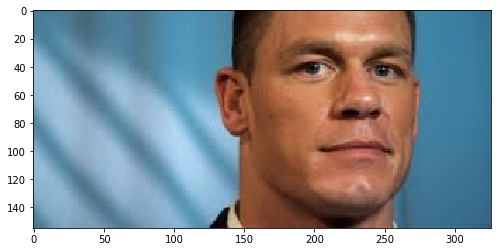

It's neither human nor dog picture


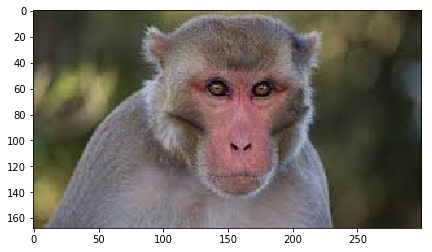

It's a dog picture 
The dog predicted bread is:
Mastiff 
The percentage of the breed probability is: 46%


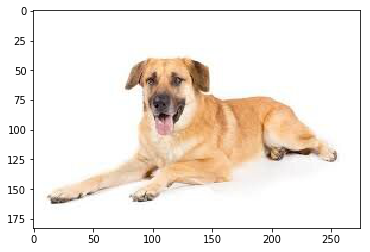

It's a dog picture 
The dog predicted bread is:
Affenpinscher 
The percentage of the breed probability is: 96%


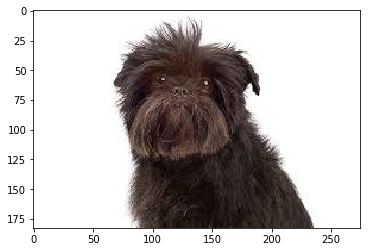

It's a human picture
The most relevant dog bread to this picture is:
Chesapeake bay retriever 
The percentage of the breed probability is: 3%


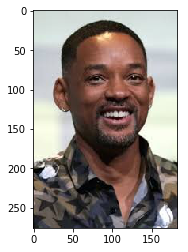

It's a dog picture 
The dog predicted bread is:
American staffordshire terrier 
The percentage of the breed probability is: 69%


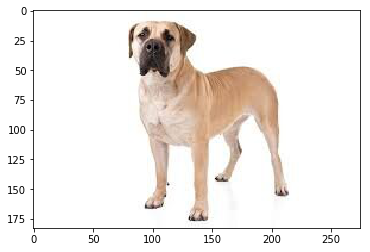

It's neither human nor dog picture


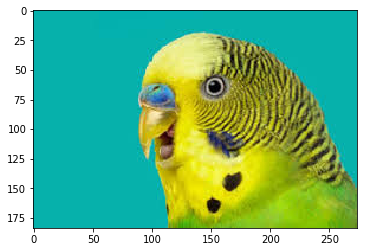

It's neither human nor dog picture


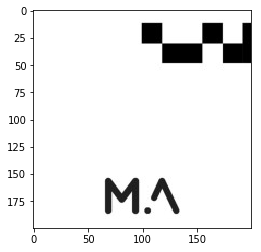

In [15]:
# test run App on images in file_img folder 
for file in list_:
    if file !='.ipynb_checkpoints':
        run_app("file_img/" + file)
        plt.show()

In [2]:
#!tar chvfz dog_proj.tar.gz *
